In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
from utils.constants import TournamentTypes, get_bid_and_won_path

# todo - read from all tournaments

df = pd.read_csv(get_bid_and_won_path(5, TournamentTypes.TINY_CHAMPIONSHIP))

In [3]:
df.head()

,bid_and_won,bid,Game ID,Bidder,Akash,Nats,Prateek,Discard,Margin
0,True,185,1,Nats,0,205,185,30,30
1,True,180,2,Nats,180,200,0,25,30
2,True,250,3,Nats,250,270,0,15,0
3,False,200,4,Nats,200,0,0,30,45
4,True,185,5,Akash,205,185,0,30,30


#### Let's get the data ready to train the model

In [4]:
# Separate features and labels
label = ['bid_and_won']
features = ['bid', 'Discard']


X = df[features]  # Feature columns
y = df[label]     # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Test data size: {X_test.shape[0]}')


Training data size: 46
Test data size: 12


Let's plot some correlation plots

In [5]:
print(df.describe())
# print(df.isnull().sum())  # Check for missing values


              bid    Game ID       Akash        Nats     Prateek    Discard  \
count   58.000000  58.000000   58.000000   58.000000   58.000000  58.000000   
mean   208.879310  29.500000  130.086207  105.258621  114.051724  25.086207   
std     26.869455  16.886879  113.421630  112.368529  109.048745  11.021963   
min    180.000000   1.000000    0.000000    0.000000    0.000000   5.000000   
25%    190.000000  15.250000    0.000000    0.000000    0.000000  20.000000   
50%    200.000000  29.500000  190.000000    0.000000  187.500000  25.000000   
75%    217.500000  43.750000  210.000000  198.750000  208.750000  30.000000   
max    280.000000  58.000000  300.000000  280.000000  280.000000  55.000000   

           Margin  
count   58.000000  
mean    33.448276  
std     32.025304  
min      0.000000  
25%     10.000000  
50%     30.000000  
75%     45.000000  
max    120.000000  


##### Label Distribution

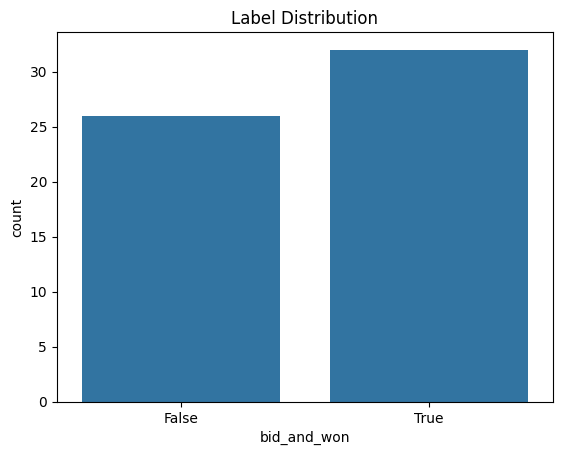

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='bid_and_won', data=df)
plt.title("Label Distribution")
plt.show()


##### Feature Distribution

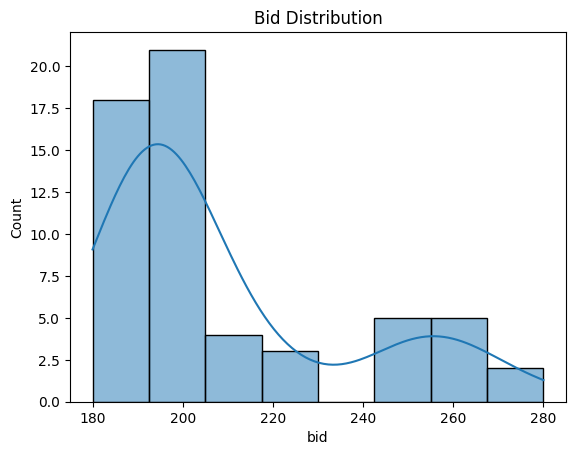

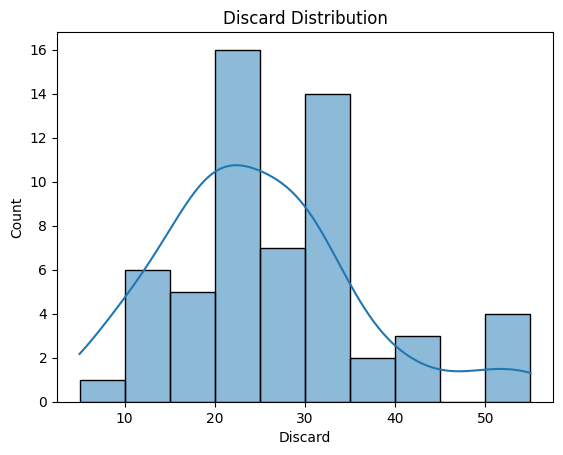

In [7]:
sns.histplot(df['bid'], kde=True)
plt.title("Bid Distribution")
plt.show()

sns.histplot(df['Discard'], kde=True)
plt.title("Discard Distribution")
plt.show()


Correlation analysis

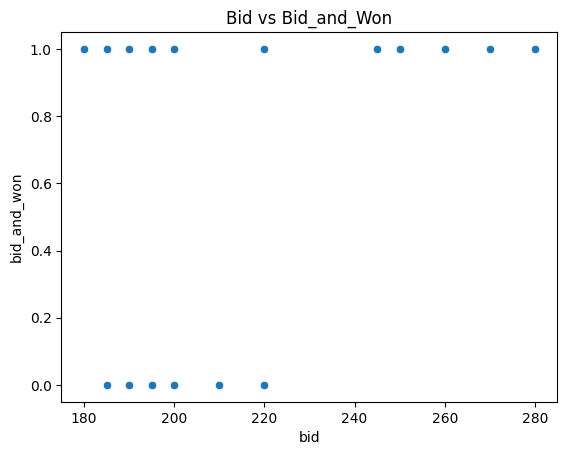

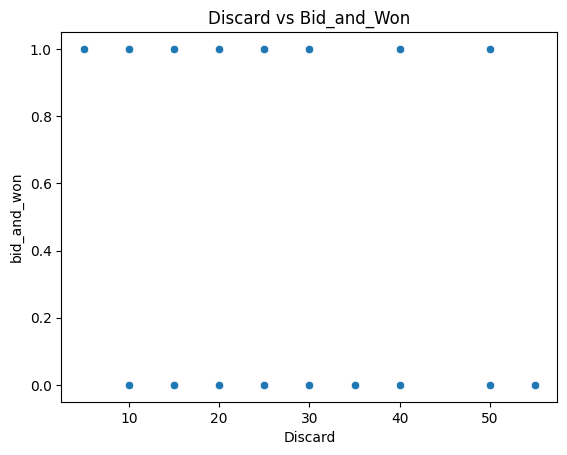

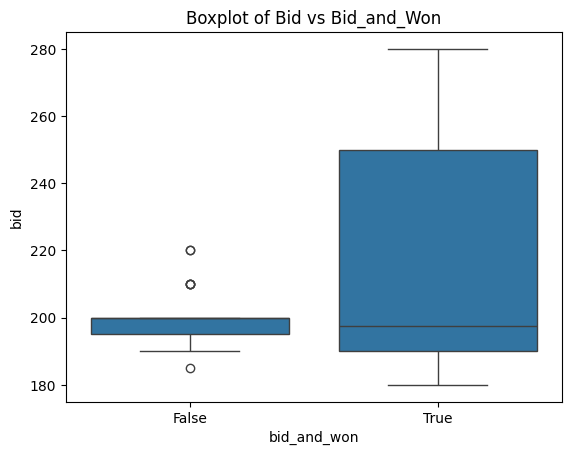

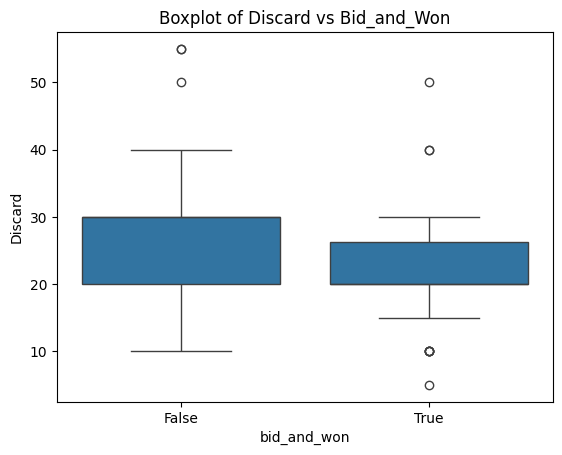

In [8]:
# Scatter plots for numerical features vs label
sns.scatterplot(x='bid', y='bid_and_won', data=df)
plt.title("Bid vs Bid_and_Won")
plt.show()

sns.scatterplot(x='Discard', y='bid_and_won', data=df)
plt.title("Discard vs Bid_and_Won")
plt.show()

# Boxplot to observe distribution of features across label values
sns.boxplot(x='bid_and_won', y='bid', data=df)
plt.title("Boxplot of Bid vs Bid_and_Won")
plt.show()

sns.boxplot(x='bid_and_won', y='Discard', data=df)
plt.title("Boxplot of Discard vs Bid_and_Won")
plt.show()


Correlation Heatmap:



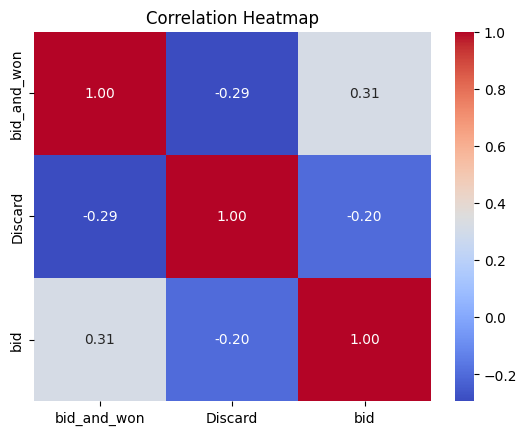

In [9]:
# Compute correlation matrix
df = df[['bid_and_won', 'Discard', 'bid']]
correlation_matrix = df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Feature-Label Correlation:



In [10]:
from scipy.stats import pearsonr

# Example: Correlation between 'bid' and 'bid_and_won'
correlation, p_value = pearsonr(df['bid'], df['bid_and_won'])
print(f"Correlation between Bid and Bid_and_Won: {correlation:.2f}, P-value: {p_value:.3f}")

# Example: Correlation between 'bid' and 'bid_and_won'
correlation, p_value = pearsonr(df['Discard'], df['bid_and_won'])
print(f"Correlation between Discard and Bid_and_Won: {correlation:.2f}, P-value: {p_value:.3f}")


Correlation between Bid and Bid_and_Won: 0.31, P-value: 0.017
Correlation between Discard and Bid_and_Won: -0.29, P-value: 0.025


Interaction Effects:

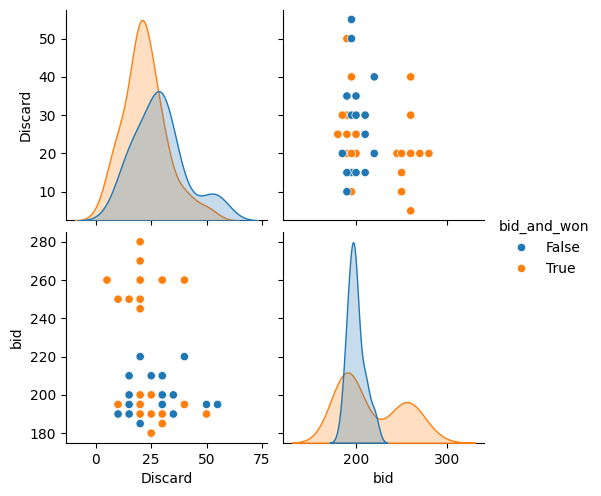

In [11]:
# Pairplot to observe interactions
sns.pairplot(df, hue='bid_and_won')
plt.show()


##### K-Nearest Neighbours

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN classifier
k = 3  # You can tune this value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.71      0.77         7
        True       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
